In [1]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Carga desde un archivo .xlsx sin indice

CredicelDB = pd.read_excel("credicel_excel.xlsx")
CredicelDB

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaT,NaN,NaN,Cancelado,0.00,0.00,0.0,0,0,NaN
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,NaT,NaN,NaN,NaN,NaN,0.00,0.0,0,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,2022-03-12,Mora,0.0,0,0.00,0.00,0.0,NaN,NaN,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,2023-04-25,NaN,NaN,10,27.40,-1.13,0.0,0,"K0,J0,D8,E2",0
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,2023-04-25,NaN,NaN,9,19.00,7.48,0.0,0,"K0,J0,D8,E2",0
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,2023-04-25,NaN,NaN,11,26.65,0.75,0.0,0,"K0,D7,F7,D8",0
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,2023-04-25,NaN,NaN,14,-17.35,-0.14,0.0,0,"J0,G1,E0,E2",0


In [7]:
#Verificamos información del DataFrame
CredicelDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [9]:
#Corroboramos valores nulos
ValoresNulos = CredicelDB.isnull().sum()
ValoresNulos

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         4197
puntos                3595
riesgo                2473
porc_enganche         2473
porc_tasa                0
score_buro               0
razones_buro          4505
semana_actual         4505
codigo_postal          685
dtype: int64

In [10]:
#Sustituir valores nulos con string
CredicelDB["empresa"]= CredicelDB["empresa"].fillna("Sin Información")
CredicelDB["fecha_ultimo_pago"]= CredicelDB["fecha_ultimo_pago"].fillna("Sin Información")
CredicelDB["fecha_pago_proximo"]= CredicelDB["fecha_pago_proximo"].fillna("Sin Información")
CredicelDB["status_cuenta"]= CredicelDB["status_cuenta"].fillna("Sin Información")
CredicelDB["riesgo"]= CredicelDB["riesgo"].fillna("Sin Información")
CredicelDB["razones_buro"]= CredicelDB["razones_buro"].fillna("Sin Información")
CredicelDB["semana_actual"]= CredicelDB["semana_actual"].fillna("Sin Información")
CredicelDB["codigo_postal"]= CredicelDB["codigo_postal"].fillna("Sin Información")
CredicelDB["porc_enganche"]= CredicelDB["porc_enganche"].fillna("Sin Información")

#Sustituir valores nulos con mediana

CredicelDB["puntos"]= CredicelDB["puntos"].fillna(round(CredicelDB["puntos"].mean(),1))

CredicelDB

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,fecha_pago_proximo,status_cuenta,puntos,riesgo,porc_enganche,porc_tasa,score_buro,razones_buro,semana_actual,codigo_postal
0,3,HDNAWQ3A,30,2021-11-12 19:00:05,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,Sin Información,Sin Información,14.1,Sin Información,Sin Información,0.00,0.0,0,0,0
1,4,M418YNR4,33,2021-11-12 19:15:58,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,Sin Información,Sin Información,14.1,Sin Información,Sin Información,0.00,0.0,0,0,0
2,5,SZ7V3NZT,37,2021-11-13 14:13:08,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,Sin Información,Sin Información,14.1,Cancelado,0.0,0.00,0.0,0,0,Sin Información
3,6,9I08UIQZ,38,2021-11-13 15:45:39,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,Sin Información,Sin Información,14.1,Sin Información,Sin Información,0.00,0.0,0,0,0
4,7,JMF4LKYU,44,2021-11-13 16:10:15,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,2022-03-12 00:00:00,Mora,0.0,0,0.0,0.00,0.0,Sin Información,Sin Información,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,2023-04-18 18:45:00,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,2023-04-25 00:00:00,Sin Información,14.1,10,27.4,-1.13,0.0,0,"K0,J0,D8,E2",0
22731,22968,NWB2EA8J,96479,2023-04-18 18:46:53,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,2023-04-25 00:00:00,Sin Información,14.1,9,19.0,7.48,0.0,0,"K0,J0,D8,E2",0
22732,22969,VDTRJ2W6,96442,2023-04-18 18:47:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,2023-04-25 00:00:00,Sin Información,14.1,11,26.65,0.75,0.0,0,"K0,D7,F7,D8",0
22733,22970,PETLF56C,96536,2023-04-18 18:49:08,Samsung,A53 5G,39S,9799.0,2799.0,0.0,...,2023-04-25 00:00:00,Sin Información,14.1,14,-17.35,-0.14,0.0,0,"J0,G1,E0,E2",0


In [11]:
#Corroboramos valores nulos
ValoresNulos = CredicelDB.isnull().sum()
ValoresNulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
razones_buro          0
semana_actual         0
codigo_postal         0
dtype: int64

Outliers

In [12]:
# Hacemos una copia de un data frame limpio
CredicelLimpio = CredicelDB.copy()

In [13]:
CredicelDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [14]:
# Elegimos solo los datos cualitativos
CredicelStr = CredicelLimpio.select_dtypes(include=['object'])
CredicelStr

,tag,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,riesgo,porc_enganche,razones_buro,semana_actual,codigo_postal
0,HDNAWQ3A,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,0,0,0
1,M418YNR4,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,0,0,0
2,SZ7V3NZT,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,Sin Información,Sin Información,Sin Información,Cancelado,0.0,0,0,Sin Información
3,9I08UIQZ,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,Sin Información,Sin Información,Sin Información,Sin Información,Sin Información,0,0,0
4,JMF4LKYU,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,2022-03-05 00:00:00,2022-03-12 00:00:00,Mora,0,0.0,Sin Información,Sin Información,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,2023-04-18 18:45:00,2023-04-25 00:00:00,Sin Información,10,27.4,0,"K0,J0,D8,E2",0
22731,NWB2EA8J,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,2023-04-18 18:46:53,2023-04-25 00:00:00,Sin Información,9,19.0,0,"K0,J0,D8,E2",0
22732,VDTRJ2W6,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,Sin Información,2023-04-18 18:47:47,2023-04-25 00:00:00,Sin Información,11,26.65,0,"K0,D7,F7,D8",0
22733,PETLF56C,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,2023-04-18 18:49:08,2023-04-25 00:00:00,Sin Información,14,-17.35,0,"J0,G1,E0,E2",0


In [15]:
# Elegimos solo los datos cuantitativos
# Separamos los datos cuantitativos también
CredicelNum = CredicelLimpio.select_dtypes(np.number)
CredicelNum

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_tasa,score_buro
0,3,30,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,0,0,0,0,14.1,0.00,0.0
1,4,33,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,0,0,0,0,14.1,0.00,0.0
2,5,37,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,0,0,0,0,14.1,0.00,0.0
3,6,38,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,0,0,0,0,14.1,0.00,0.0
4,7,44,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,0,0,0,0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211,3052.0,5486,0.0,1,0,0,0,0,14.1,-1.13,0.0
22731,22968,96479,4100.0,1209.0,0.0,200,2891.0,5200,0.0,1,0,0,0,0,14.1,7.48,0.0
22732,22969,96442,4849.0,1152.0,0.0,256,3697.0,6656,0.0,1,0,0,0,0,14.1,0.75,0.0
22733,22970,96536,9799.0,2799.0,0.0,386,7000.0,15054,0.0,1,0,0,0,0,14.1,-0.14,0.0


<Figure size 1500x800 with 0 Axes>

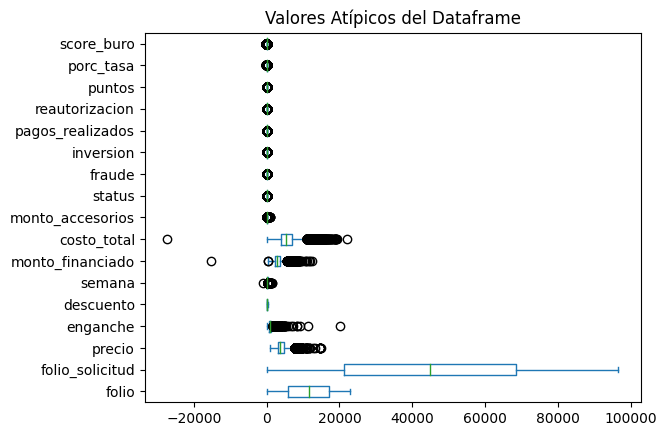

In [16]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
CredicelNum.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [17]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y= CredicelNum
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido folio                31323.107698
folio_solicitud     127723.906961
precio                8081.558082
enganche              2356.496845
descuento              478.215020
semana                 541.287392
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
fraude                   0.864131
inversion                1.511599
pagos_realizados        39.306132
reautorizacion           0.578086
puntos                  42.386431
porc_tasa               24.630537
score_buro              13.931194
dtype: float64
Limite inferior permitido folio               -8301.055796
folio_solicitud    -36023.715538
precio                -87.484900
enganche             -503.622066
descuento            -321.263535
semana                -65.792692
monto_financiado     -214.044583
costo_total         -1458.203597
monto_accesorios     -164.333344
status                 -0.100423
fraude                 -0

In [19]:
#Encontramos Ouliers del Dataframe
outliers= CredicelNum[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_tasa,score_buro
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22733,NaN,NaN,9799.0,2799.0,NaN,NaN,7000.0,15054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= CredicelNum[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_tasa,score_buro
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0.0,0,0.0,0.0,14.1,0.00,0.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0,0.0,0.0,14.1,-1.13,0.0
22731,22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0,0.0,0.0,14.1,7.48,0.0
22732,22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0,0.0,0.0,14.1,0.75,0.0
22733,22970,96536,NaN,NaN,0.0,386.0,NaN,NaN,0.0,1.0,0.0,0,0.0,0.0,14.1,-0.14,0.0


In [21]:
#Corroboramos valores nulos del dataframe
valores_nulos=data3.isnull().sum()
valores_nulos

folio                  0
folio_solicitud        0
precio               110
enganche             292
descuento             17
semana               362
monto_financiado     182
costo_total          290
monto_accesorios     617
status               154
fraude              1701
inversion              0
pagos_realizados     184
reautorizacion       774
puntos               954
porc_tasa            899
score_buro           582
dtype: int64

In [22]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_tasa,score_buro
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0.0,0,0.0,0.0,14.1,0.00,0.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,0,0.0,0.0,14.1,-1.13,0.0
22731,22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,0,0.0,0.0,14.1,7.48,0.0
22732,22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,0,0.0,0.0,14.1,0.75,0.0
22733,22970,96536,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,0.0,0,0.0,0.0,14.1,-0.14,0.0


In [23]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

folio               0
folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
porc_tasa           0
score_buro          0
dtype: int64

In [24]:
# Unimos los datos cuantitativos al dataframe

Datos_limpios = pd.concat([CredicelStr, data_clean], axis=1)
Datos_limpios

,tag,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,...,costo_total,monto_accesorios,status,fraude,inversion,pagos_realizados,reautorizacion,puntos,porc_tasa,score_buro
0,HDNAWQ3A,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,Sin Información,Sin Información,Sin Información,...,2106.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
1,M418YNR4,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,Sin Información,Sin Información,Sin Información,...,2925.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
2,SZ7V3NZT,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,Sin Información,Sin Información,Sin Información,...,2210.0,0.0,1.2,0.0,0,0.0,0.0,14.1,0.00,0.0
3,9I08UIQZ,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,Sin Información,Sin Información,Sin Información,...,2210.0,0.0,2.0,0.0,0,0.0,0.0,14.1,0.00,0.0
4,JMF4LKYU,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,2022-03-05 00:00:00,2022-03-12 00:00:00,Mora,...,6942.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,2023-04-18 18:45:00,2023-04-25 00:00:00,Sin Información,...,5486.0,0.0,1.0,0.0,0,0.0,0.0,14.1,-1.13,0.0
22731,NWB2EA8J,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,2023-04-18 18:46:53,2023-04-25 00:00:00,Sin Información,...,5200.0,0.0,1.0,0.0,0,0.0,0.0,14.1,7.48,0.0
22732,VDTRJ2W6,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,Sin Información,2023-04-18 18:47:47,2023-04-25 00:00:00,Sin Información,...,6656.0,0.0,1.0,0.0,0,0.0,0.0,14.1,0.75,0.0
22733,PETLF56C,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,2023-04-18 18:49:08,2023-04-25 00:00:00,Sin Información,...,5588.6,0.0,1.0,0.0,0,0.0,0.0,14.1,-0.14,0.0


In [25]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos_final = Datos_limpios.isnull().sum()
valores_nulos_final

tag                   0
marca                 0
modelo                0
plazo                 0
agente_venta          0
dis_venta             0
empresa               0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
riesgo                0
porc_enganche         0
razones_buro          0
semana_actual         0
codigo_postal         0
folio                 0
folio_solicitud       0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
status                0
fraude                0
inversion             0
pagos_realizados      0
reautorizacion        0
puntos                0
porc_tasa             0
score_buro            0
dtype: int64

In [26]:
#Convertir archivo filtrado a CSV
Datos_limpios.to_csv("PrepCrit2.csv")